# 테이블 데이터 다루기

- 데이터프레임 다루기
- pIC50 데이터 사용
- groupby 사용

# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 데이터 처리
- SD File 포맷
- hERG assays in the ChEMBL database

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/PatWalters/practical_cheminformatics_tutorials/main/data/ChEMBL_hERG.csv")
print(df.shape)
df[:3]

(8989, 13)


,canonical_smiles,molregno,mol_chembl_id,standard_relation,standard_value,standard_type,standard_units,description,organism,assay_type,confidence_score,pref_name,tgt_chembl_id
0,COCC(=O)O[C@]1(CCN(C)CCCc2nc3ccccc3[nH]2)CCc4c...,72035,CHEMBL45816,=,1430.0,IC50,nM,K+ channel blocking activity in COS-7 African ...,Homo sapiens,F,9,HERG,CHEMBL240
1,CC(C)COCC(CN(Cc1ccccc1)c2ccccc2)N3CCCC3,112651,CHEMBL1008,=,550.0,IC50,nM,K+ channel blocking activity in COS-7 African ...,Homo sapiens,F,9,HERG,CHEMBL240
2,COc1c(N2C[C@@H]3CCCN[C@@H]3C2)c(F)cc4C(=O)C(=C...,1788,CHEMBL32,=,129000.0,IC50,nM,K+ channel blocking activity in Chinese hamste...,Homo sapiens,F,9,HERG,CHEMBL240


- 데이터프레임 기본 정보

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8989 entries, 0 to 8988
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   canonical_smiles   8989 non-null   object 
 1   molregno           8989 non-null   int64  
 2   mol_chembl_id      8989 non-null   object 
 3   standard_relation  8989 non-null   object 
 4   standard_value     8989 non-null   float64
 5   standard_type      8989 non-null   object 
 6   standard_units     8989 non-null   object 
 7   description        8989 non-null   object 
 8   organism           8989 non-null   object 
 9   assay_type         8989 non-null   object 
 10  confidence_score   8989 non-null   int64  
 11  pref_name          8989 non-null   object 
 12  tgt_chembl_id      8989 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 913.1+ KB


- 컬럼 인덱스 보기

In [4]:
df.columns

Index(['canonical_smiles', 'molregno', 'mol_chembl_id', 'standard_relation',
       'standard_value', 'standard_type', 'standard_units', 'description',
       'organism', 'assay_type', 'confidence_score', 'pref_name',
       'tgt_chembl_id'],
      dtype='object')

- 연속 변수 속성 보기

In [5]:
df.describe()

,molregno,standard_value,confidence_score
count,8.989000e+03,8.989000e+03,8989.000000
mean,1.162010e+06,9.680188e+05,8.944599
std,6.612153e+05,2.558712e+07,0.228774
min,9.700000e+01,1.400000e-01,8.000000
25%,5.569920e+05,1.880000e+03,9.000000
50%,1.280901e+06,9.400000e+03,9.000000
75%,1.748621e+06,2.900000e+04,9.000000
max,2.196506e+06,1.000000e+09,9.000000


In [6]:
# 문자열 변수 속성 보기
df.describe(include=object).T

,count,unique,top,freq
canonical_smiles,8989,7438,CC(C)(C)c1ccc(cc1)C(O)CCCN2CCC(CC2)C(O)(c3cccc...,18
mol_chembl_id,8989,7438,CHEMBL17157,18
standard_relation,8989,6,=,6655
standard_type,8989,1,IC50,8989
standard_units,8989,1,nM,8989
description,8989,539,Inhibition of human ERG,1346
organism,8989,1,Homo sapiens,8989
assay_type,8989,2,B,8791
pref_name,8989,1,HERG,8989
tgt_chembl_id,8989,1,CHEMBL240,8989


## 범주형 변수로 표시

- molregno는 숫자로 표현되어 있지만 범주형(categorical) 변수임
- 파이썬의 int 타입을 str 으로 변경
- 데이터프레임에서는 파이썬의 str(문자열)을 object로 표현함

In [7]:
df.molregno = df.molregno.apply(str)
df.describe(include=object).T

,count,unique,top,freq
canonical_smiles,8989,7438,CC(C)(C)c1ccc(cc1)C(O)CCCN2CCC(CC2)C(O)(c3cccc...,18
molregno,8989,7438,19569,18
mol_chembl_id,8989,7438,CHEMBL17157,18
standard_relation,8989,6,=,6655
standard_type,8989,1,IC50,8989
standard_units,8989,1,nM,8989
description,8989,539,Inhibition of human ERG,1346
organism,8989,1,Homo sapiens,8989
assay_type,8989,2,B,8791
pref_name,8989,1,HERG,8989


## 어세이 타입

- binding assays (B), and functional assays (F)

<AxesSubplot:>

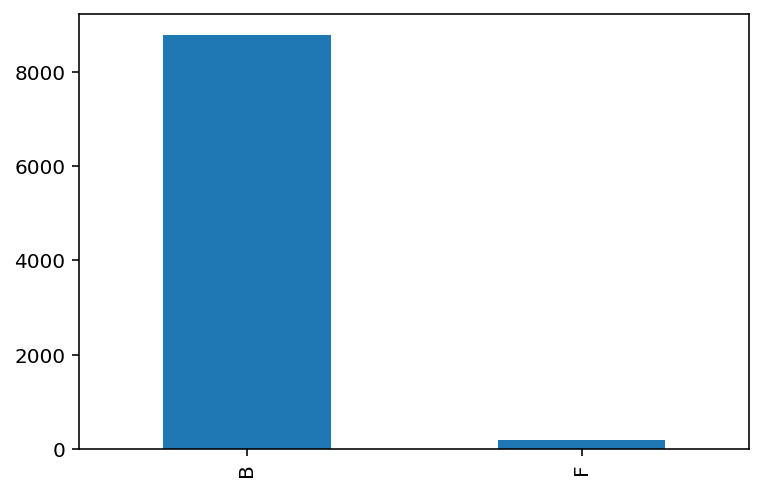

In [8]:
df.assay_type.value_counts().plot(kind='bar')

- binding assays 데이터만 사용하는 경우

In [9]:
df =df[df.assay_type == 'B']
df.shape

(8791, 13)

## 중복된 값 처리

- 중복된 molregno (같은 분자) 데이터를 찾아본다
- 평균치를 취하겠다

In [10]:
len(df), len(df.molregno.unique())

(8791, 7382)

In [11]:
gb = df.groupby("molregno")

In [12]:
gb.ngroups

7382

- molregno가 같은 샘플 수가 2개 이상인 경우 standard_value 값들 보기

In [13]:
dup_list = []
for k,v in gb:
    if len(v) > 1:
      dup_list.append([k,v.standard_value.values])
dup_df = pd.DataFrame(dup_list,columns=["name","standard_value"])

print(dup_df.shape)
dup_df[:20]

(822, 2)


,name,standard_value
0,10358,"[20892.96, 1100.0, 20892.96, 20892.96, 20892.96]"
1,1037723,"[130.0, 130.0]"
2,1056655,"[3900.0, 3900.0]"
3,10661,"[1100.0, 12618.2]"
4,1073158,"[1700.0, 1700.0, 1700.0]"
5,1073455,"[7400.0, 7400.0]"
6,1074880,"[11200.0, 11200.0, 19000.0]"
7,1075287,"[10000.0, 10000.0]"
8,10813,"[10.0, 3.0, 3.0, 10.0, 14.7, 14.7, 10.0, 14.13..."
9,10819,"[7.0, 6.918]"


- 중복 샘플의 경우 평균치로 대체하고 데이터프레임을 새로 작성

In [14]:
row_list = []
for k,v in gb:
  row_list.append([k,v.standard_value.mean()])
row_df = pd.DataFrame(row_list,columns=["name","standard_value"])

print(row_df.shape)
row_df[:10]

(7382, 2)


,name,standard_value
0,10358,16934.368
1,1037723,130.000
2,1038161,700.000
3,1038163,20000.000
4,1038164,20000.000
5,1038197,8000.000
6,1038198,65000.000
7,104385,100.000
8,1050197,380.000
9,1052745,5902.400


- 데이터 분포 보기

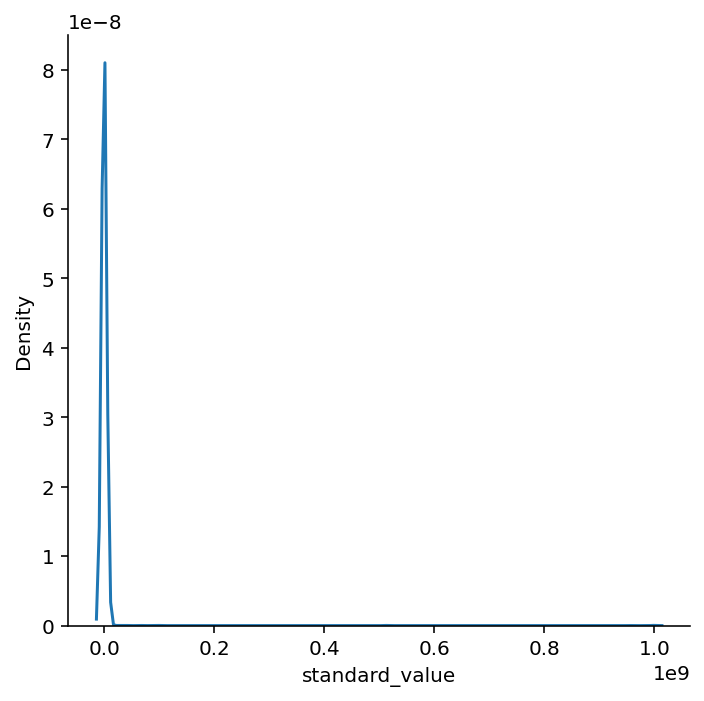

In [15]:
ax = sns.displot(row_df.standard_value,kind="kde")

## pIC50

-  -log(PIC50)

In [16]:
row_df["pIC50"] = -np.log10(row_df.standard_value * 1e-9)
row_df[:3]

,name,standard_value,pIC50
0,10358,16934.368,4.771231
1,1037723,130.000,6.886057
2,1038161,700.000,6.154902


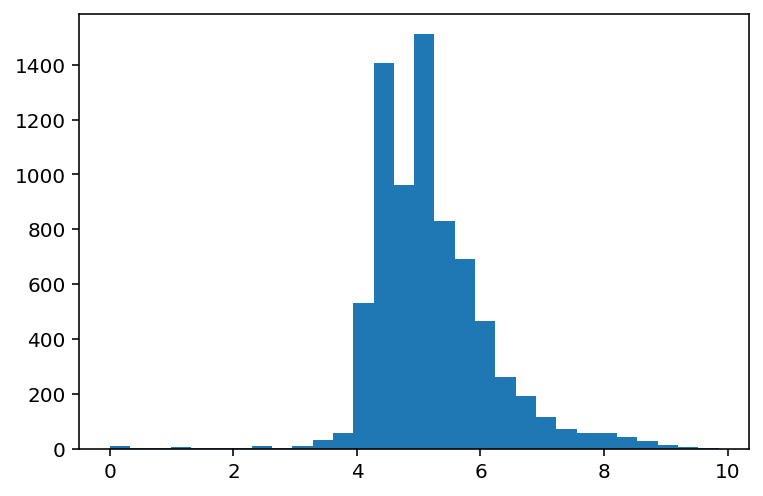

In [17]:
import matplotlib.pyplot as plt
ax = plt.hist(row_df.pIC50, bins=30)

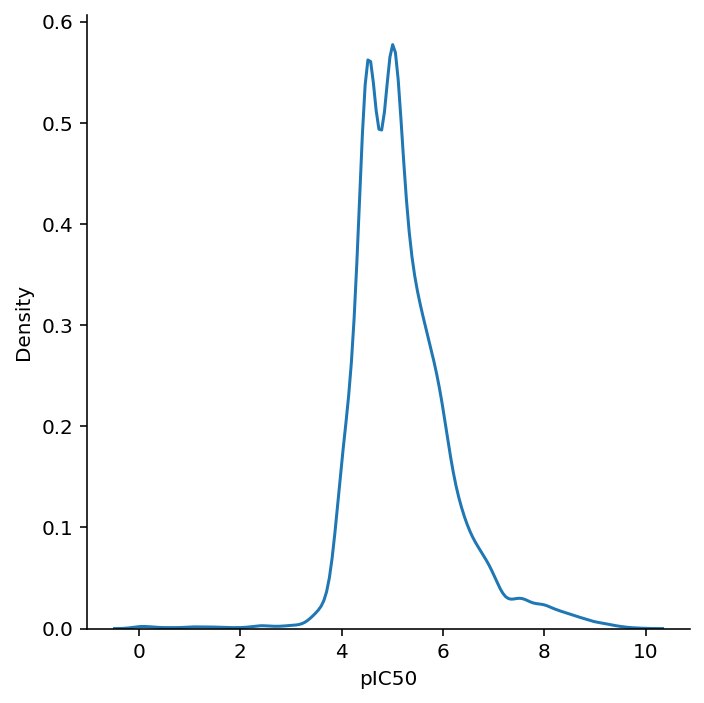

In [18]:
_ = sns.displot(row_df.pIC50,kind="kde")

## 데이터 오류

- 오류로 0이 입력된 것을 찾는다

In [19]:
row_df.sort_values("pIC50",ascending=True)[:10]

,name,standard_value,pIC50
3066,1758382,1.000000e+09,-0.00000
3065,1758380,1.000000e+09,-0.00000
3067,1758385,1.000000e+09,-0.00000
5531,440049,9.549926e+08,0.02000
5545,440263,7.585776e+08,0.12000
5538,440132,6.456542e+08,0.19000
5543,440223,5.128614e+08,0.29000
5526,440003,5.128614e+08,0.29000
5551,440395,2.685160e+08,0.57103
5548,440302,2.511886e+08,0.60000


## High Confidence Data

- Confidence 분포 보기
- 높은 Confidence를 가진 데이터만 사용하기

In [20]:
df.confidence_score.value_counts()

9    8395
8     396
Name: confidence_score, dtype: int64

We will create a new dataframe with only the molecules have a confidence score of 9.

In [21]:
level_map = {8: 'fair', 9: 'good'}
df['confidence_level'] = df.confidence_score.map(level_map)
df.head()

,canonical_smiles,molregno,mol_chembl_id,standard_relation,standard_value,standard_type,standard_units,description,organism,assay_type,confidence_score,pref_name,tgt_chembl_id,confidence_level
46,COC(=O)C1=C(C)NC(=C(C1c2ccccc2[N+](=O)[O-])C(=...,419596,CHEMBL193,=,50118.72,IC50,nM,Inhibition of human Potassium channel HERG exp...,Homo sapiens,B,9,HERG,CHEMBL240,good
47,CN(CCOc1ccc(NS(=O)(=O)C)cc1)CCc2ccc(NS(=O)(=O)...,5638,CHEMBL473,=,10.00,IC50,nM,Inhibition of human Potassium channel HERG exp...,Homo sapiens,B,9,HERG,CHEMBL240,good
48,CCOC(=O)N1CCC(=C2c3ccc(Cl)cc3CCc4cccnc24)CC1,110803,CHEMBL998,=,169.82,IC50,nM,Inhibition of human Potassium channel HERG exp...,Homo sapiens,B,9,HERG,CHEMBL240,good
49,Oc1ccc(CCN2CCC(CC2)Nc3nc4ccccc4n3Cc5ccc(F)cc5)cc1,91240,CHEMBL60796,=,1.00,IC50,nM,Inhibition of human Potassium channel HERG exp...,Homo sapiens,B,9,HERG,CHEMBL240,good
50,Cc1[nH]cnc1CN2CCc3c(C2=O)c4ccccc4n3C,153342,CHEMBL1110,=,3235.94,IC50,nM,Inhibition of human Potassium channel HERG exp...,Homo sapiens,B,9,HERG,CHEMBL240,good


- boxplot

[None, Text(0.5, 0, 'Confidence Level'), Text(0, 0.5, 'IC50 (nM)')]

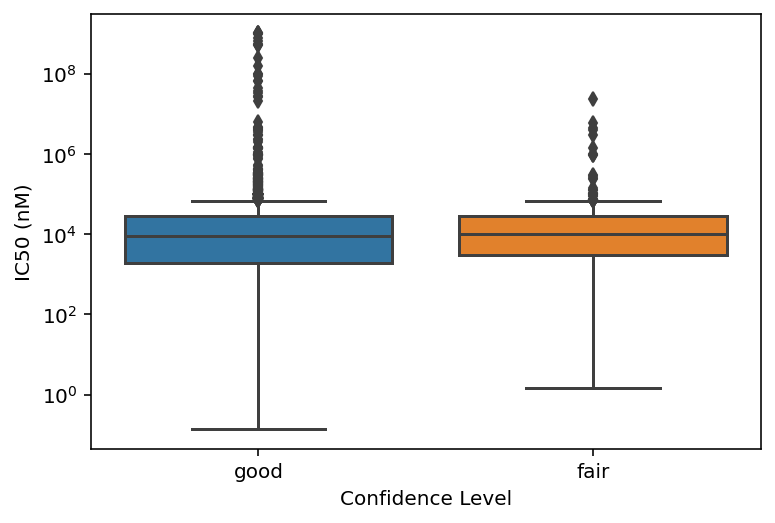

In [22]:
ax = sns.boxplot(data=df,x="confidence_level",y="standard_value")
ax.set(yscale="log",xlabel="Confidence Level",ylabel="IC50 (nM)")